# Youtube Chord OCR #

This notebook shows how to create chord labeled audio files from youtube play along videos. The code works for videos from the channel Ukulele Underground, and will need some small modifications to work with other videos.

The code for the video-ocr module can be found in the [youtube chord ocr github](https://github.com/henridwyer/youtube-chord-ocr) repository.

The goal is to create a labeled data set in order train a machine learning algorithm to recognize chords. For context, see this post on [creating a chord classifier using neural networks](http://henri.io/posts//posts/chord-classification-using-neural-networks.html), and this post on [youtube chord ocr](http://henri.io/posts/youtube-chord-ocr.html).

Here's an example of the type of video I'm referring to:

In [6]:
from IPython.display import YouTubeVideo
# "Brown Eyed Girl" (Van Morrison) Ukulele Play-Along!
# By Ukulele Underground (Aldrine Guerrero)
YouTubeVideo('W9ae67wY8pc#t=35')

# Contents #
- [Downloading Videos](#Downloading-Videos)
- [Reading Chords](#Reading-Chords)
- [Creating Labeled Audio Files](#Creating-Labeled-Audio-Files)
- [Tying Everything Together](#Tying-Everything-Together)
- [Profiling](#Profiling)

## Downloading Videos ##

First we will scrape a list of videos according to certain search criteria, and then download them.

In order to download the videos, we will use the python package [youtube-dl](https://github.com/rg3/youtube-dl). 

In [7]:
import lxml
from lxml import html
import requests

In [ ]:
USER = 'ukuleleunderground'
QUERY = 'play along'
req = requests.get('https://www.youtube.com/user/' + USER + '/search?query=' + QUERY).text

In [22]:
# Use XPath to get the video links
tree = html.fromstring(req)
links = tree.xpath('//ul[@id="browse-items-primary"]/li//h3/a')
video_links = ['http://www.youtube.com' +  link.xpath('./@href')[0] for link in links if 'Ukulele Play-Along!' in link.xpath('string(.)')]
video_links[:5]

['http://www.youtube.com/watch?v=ZDeZv5cwbew',
 'http://www.youtube.com/watch?v=-GxlGDXgT-I',
 'http://www.youtube.com/watch?v=P0xzFcUoLYw',
 'http://www.youtube.com/watch?v=HskwH5BvWL8',
 'http://www.youtube.com/watch?v=9mvxDa57o0w']

In [14]:
import youtube_dl
# by default, youtube-dl tries to get the highest quality video and audio possible. This is what we want.
ydl_opts = {"format":"mp4"}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(video_links[:1])

[youtube] ZDeZv5cwbew: Downloading webpage
[youtube] ZDeZv5cwbew: Extracting video information
[youtube] ZDeZv5cwbew: Downloading DASH manifest
[download] Destination: 'Danny's Song' (Kenny Loggins) Ukulele Play-Along!-ZDeZv5cwbew.mp4
[download] 100% of 59.25MiB in 02:12


## Reading Chords ##

Before doing this, it's useful to check that all of the videos are the same format. Then move the correct ones to a folder called songs.

In [44]:
reload(video_ocr)

<module 'video_ocr' from 'video_ocr.py'>

In [45]:
import video_ocr, cv2

In [46]:
videos = !ls songs | grep mp4
videos = ['songs/' + v for v in videos]
videos[:5]

["songs/'(I Can't Get No) Satisfaction' (The Rolling Stones) Ukulele Play-Along!-kXSIr2lumOE.mp4",
 "songs/'Best Day of My Life' (American Authors) Ukulele Play-Along!-U8z1NyrN3xQ.mp4",
 "songs/'Brown Eyed Girl' (Van Morrison) Ukulele Play-Along!-W9ae67wY8pc.mp4",
 "songs/'Danny's Song' (Kenny Loggins) Ukulele Play-Along!-ZDeZv5cwbew.mp4",
 "songs/'Escape (The Pin\xcc\x83a Colada Song)' Ukulele Play-Along!-iyI6wE4cm6g.mp4"]

In [74]:
video = videos[0]
print "Reading " + video
vidcap = cv2.VideoCapture(video)
video_nb_frames = vidcap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT)
print video_nb_frames, "frames"
vidcap.isOpened()
video_fps = vidcap.get(cv2.cv.CV_CAP_PROP_FPS)

Reading songs/'(I Can't Get No) Satisfaction' (The Rolling Stones) Ukulele Play-Along!-kXSIr2lumOE.mp4
7491.0 frames


### Read the active chord of a frame ###

'E'

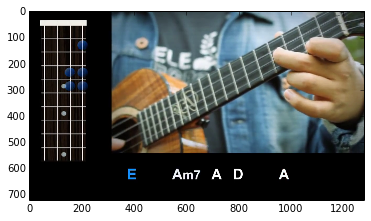

In [57]:
video_ocr.skip_frames(vidcap, 400) # the first frames don't have chords
success,image = vidcap.read()
video_ocr.show_img(image)

# In order to get the active chord of a frame, call:
video_ocr.get_active_chord(image)

### Read the active chords of each frame ###

In [49]:
vidcap = cv2.VideoCapture(video) # reopen the video to start at the beginning

In [51]:
frame_chords = video_ocr.vidcap_to_frame_chords(vidcap, video_fps, nb_frames = -1)
frame_chords

[False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,


### Convert to intervals ###

Chords generally come in intervals: several consecutive frames have the same chord. We can write this as a list:

(start frame, end frame), chord name

In [52]:
chord_intervals = video_ocr.frame_chords_to_chord_intervals(frame_chords)
print len(chord_intervals.items())
chord_intervals.items()

221


[((262, 295), 'E'),
 ((296, 303), 'Am7'),
 ((304, 310), 'A'),
 ((311, 348), 'D'),
 ((349, 368), 'A'),
 ((369, 401), 'E'),
 ((402, 409), 'Am7'),
 ((410, 416), 'A'),
 ((417, 454), 'D'),
 ((455, 474), 'A'),
 ((475, 507), 'E'),
 ((508, 515), 'Am7'),
 ((516, 523), 'A'),
 ((524, 560), 'D'),
 ((561, 570), 'A'),
 ((580, 685), 'E'),
 ((686, 787), 'A'),
 ((791, 894), 'E'),
 ((895, 967), 'A'),
 ((999, 1049), 'E'),
 ((1050, 1102), 'B7'),
 ((1103, 1153), 'E'),
 ((1154, 1175), 'A'),
 ((1207, 1241), 'E'),
 ((1242, 1249), 'Am7'),
 ((1250, 1256), 'A'),
 ((1257, 1293), 'D'),
 ((1312, 1346), 'E'),
 ((1347, 1354), 'Am7'),
 ((1355, 1361), 'A'),
 ((1362, 1396), 'D'),
 ((1398, 1417), 'A'),
 ((1418, 1452), 'E'),
 ((1453, 1460), 'Am7'),
 ((1461, 1467), 'A'),
 ((1468, 1502), 'D'),
 ((1503, 1522), 'A'),
 ((1523, 1557), 'E'),
 ((1558, 1566), 'Am7'),
 ((1567, 1573), 'A'),
 ((1574, 1609), 'D'),
 ((1610, 1629), 'A'),
 ((1630, 1665), 'E'),
 ((1666, 1673), 'Am7'),
 ((1674, 1680), 'A'),
 ((1681, 1714), 'D'),
 ((1715, 1

### Clean intervals ###

Sometimes some frames get misread, so first we'll remove any interval that is too short. Then we'll merge intervals that are separated by only a few frames without any chord.

In [60]:
video_ocr.filter_chord_intervals(chord_intervals, video_fps)
print len(chord_intervals.items())

139


In [62]:
merged = video_ocr.merge_chord_intervals(chord_intervals, video_fps)
print len(merged.items())

138


In [63]:
merged

OrderedDict([((262, 295), 'E'), ((311, 348), 'D'), ((349, 368), 'A'), ((369, 401), 'E'), ((417, 454), 'D'), ((455, 474), 'A'), ((475, 507), 'E'), ((524, 560), 'D'), ((561, 570), 'A'), ((580, 685), 'E'), ((686, 787), 'A'), ((791, 894), 'E'), ((895, 967), 'A'), ((999, 1049), 'E'), ((1050, 1102), 'B7'), ((1103, 1153), 'E'), ((1154, 1175), 'A'), ((1207, 1241), 'E'), ((1257, 1293), 'D'), ((1312, 1346), 'E'), ((1362, 1396), 'D'), ((1398, 1417), 'A'), ((1418, 1452), 'E'), ((1468, 1502), 'D'), ((1503, 1522), 'A'), ((1523, 1557), 'E'), ((1574, 1609), 'D'), ((1610, 1629), 'A'), ((1630, 1665), 'E'), ((1681, 1714), 'D'), ((1715, 1735), 'A'), ((1736, 1771), 'E'), ((1786, 1820), 'D'), ((1821, 1841), 'A'), ((1842, 1876), 'E'), ((1892, 1925), 'D'), ((1926, 1946), 'A'), ((1947, 1981), 'E'), ((1997, 2033), 'D'), ((2035, 2052), 'A'), ((2053, 2077), 'E'), ((2159, 2192), 'E'), ((2208, 2244), 'D'), ((2245, 2264), 'A'), ((2265, 2299), 'E'), ((2313, 2348), 'D'), ((2370, 2478), 'E'), ((2479, 2583), 'A'), ((258

## Creating Labeled Audio Files ##

First, we will create a wav file that contains the audio from the video using ffmpeg. Then we will split the audio file according to the intervals creating above.

In [65]:
wav_file = video_ocr.extract_audio_from_video(video)
wav_file

"'(I Can't Get No) Satisfaction' (The Rolling Stones) Ukulele Play-Along!-kXSIr2lumOE.wav"

In [68]:
import os
output_dir = video_ocr.get_file_name(video) + '/'
print output_dir

# if the directory doesn't exist, create it. Otherwise, delete the contents.
try:
    os.mkdir(output_dir)
except OSError:
    files = ! ls {json.dumps(output_dir)}
    for f in files:
        os.remove(output_dir + f)
    pass #directory already exists, clear contents

'(I Can't Get No) Satisfaction' (The Rolling Stones) Ukulele Play-Along!-kXSIr2lumOE/


In [75]:
video_ocr.chord_intervals_to_audio_snips(chord_intervals, wav_file, output_dir, video_nb_frames)

In [ ]:
video_ocr.cleanup()

## Tying Everything Together ##

This function creates a folder output, with 1 subfolder for each video, containing the labeled audio files.

In [97]:
video_ocr.video_list_to_audio_snips(videos, True)

Now reading songs/'(I Can't Get No) Satisfaction' (The Rolling Stones) Ukulele Play-Along!-kXSIr2lumOE.mp4
Output directory output/'(I Can't Get No) Satisfaction' (The Rolling Stones) Ukulele Play-Along!-kXSIr2lumOE/
Output directory not empty. Deleting files
Reading songs/'(I Can't Get No) Satisfaction' (The Rolling Stones) Ukulele Play-Along!-kXSIr2lumOE.mp4
Reading frame chords...
Finished reading frame chords.
Creating chords intervals...
Finished creating chord intervals.
Extracting audio from video...
Finished extracting audio from video.
Creating audio snips...
Finished creating audio snips.
Cleaning up...
Now reading songs/'Best Day of My Life' (American Authors) Ukulele Play-Along!-U8z1NyrN3xQ.mp4
Output directory output/'Best Day of My Life' (American Authors) Ukulele Play-Along!-U8z1NyrN3xQ/
Reading songs/'Best Day of My Life' (American Authors) Ukulele Play-Along!-U8z1NyrN3xQ.mp4
Reading frame chords...
Finished reading frame chords.
Creating chords intervals...
Finished cr

# Profiling #

Run this code to profile the get_active_chord function.

In [85]:
video = videos[0]
print "Reading " + video
vidcap = cv2.VideoCapture(video)
print(vidcap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT))
vidcap.isOpened()

Reading songs/'(I Can't Get No) Satisfaction' (The Rolling Stones) Ukulele Play-Along!-kXSIr2lumOE.mp4
7491.0


True

In [21]:
def read_frames(nb_frames):
    frame_chords = []
    previous_frame = None
    for i in range(nb_frames):
        success,image = vidcap.read()
        frame_chords.append(get_active_chord(image))
    return frame_chords

In [23]:
# run cprofilev cprofile_output.txt
pr = cProfile.Profile()
pr.runctx('read_frames(500)', None, locals())
pr.dump_stats("cprofile_output.txt")